In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(12,5)

In [36]:
def plot_it(f, xs, ii, conv, dom=np.linspace(-1,1,1000), title='f(x) = '):
    plt.subplot(121)
    plt.plot(dom, f(dom), label='True')
    plt.plot(xs, f(xs),'-o', label='Approx')
    plt.title('Estimate')
    plt.legend()

    plt.subplot(122)
    plt.plot(np.linspace(0, ii-1, ii-1), np.abs(xs[1:] - xs[:-1]))
    plt.title(f'Convergence = {conv}')
    plt.xlabel('iteration')
    plt.ylabel('change in minimizer estimate')

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

### 12.10 - Newton's Method

In [37]:
def newton(f, df, d2f, x0=1, eps=1e-10, M=100):
    """
    inputs:
        f - function (lambda)
        df - first derivative (lambda)
        d2f - second derivative (lambda)
        x0 - initial guess (float)
        eps - tolerance (float)
        M - max iterations (int)
        
    outputs:
        min_estimates - min estimates (array)
        num_iterations - number of steps (int)
        converged - converged? (bool)
    """

    min_estimates = list()
    
    # Assume failure to converge unless tolerance is reached
    converged = False

    # Iterate at most N times
    for k in range(M):
        
        # Compute the next iteration
        x1 = x0 - df(x0)/d2f(x0)
        min_estimates.append(x1)
        
        # Check for convergence
        if np.abs(x1 - x0) < eps:
            # Upon convergence, stop iterating
            converged = True
            break

        # Otherwise, update the guess for the next iteration
        x0 = x1
    
    return np.array(min_estimates), k+1, converged

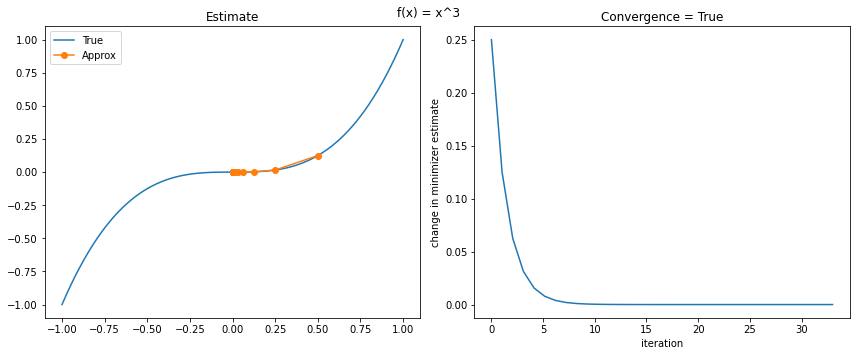

In [38]:
# f(x) = x^3

f = lambda x : x**3
df = lambda x : 3*x**2      # 1st derivative
d2f = lambda x : 6*x        # 2nd derivative

xs, ii, conv = newton(f, df, d2f)
plot_it(f, xs, ii, conv, title='f(x) = x^3')

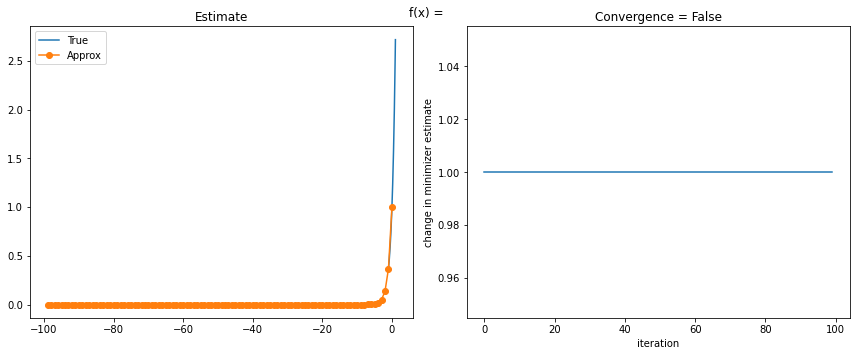

In [39]:
# f(x) = e^x, play with M

f = lambda x : np.exp(x)
df = lambda x : np.exp(x)
d2f = lambda x : np.exp(x)

xs, ii, conv = newton(f, df, d2f, M = 100)
plot_it(f, xs, ii, conv)

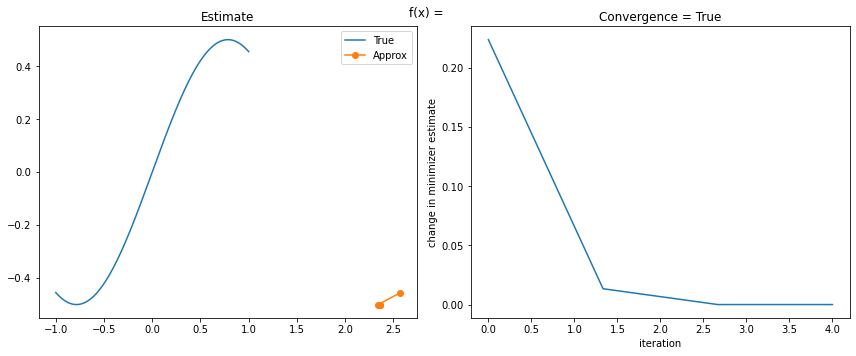

In [51]:
# f(x) = np.sin(x)*np.cos(x), x0=0.1

f = lambda x : np.sin(x)*np.cos(x)
df = lambda x : -np.sin(x)**2 + np.cos(x)**2
d2f = lambda x : -4*np.sin(x)*np.cos(x)

xs, ii, conv = newton(f, df, d2f, x0=0.1)
plot_it(f, xs, ii, conv)

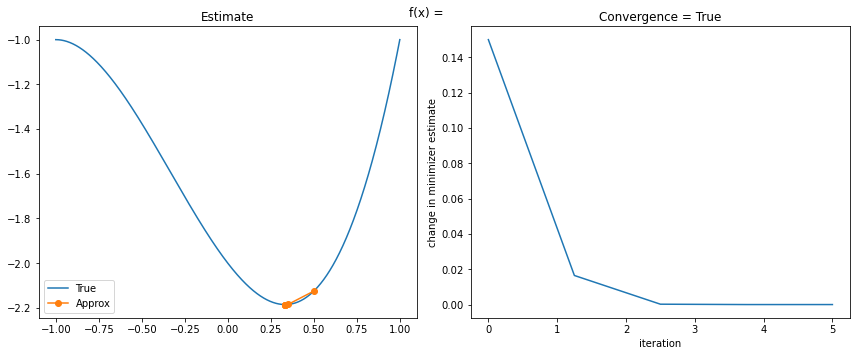

In [53]:
# f(x) = x^3+x^2-x-2

f = lambda x : x**3 + x**2 - x - 2 # function
df = lambda x : 3*x**2 + 2*x - 1   # 1st derivative
d2f = lambda x : 6*x + 2           # 2nd derivative

xs, ii, conv = newton(f, df, d2f)
plot_it(f, xs, ii, conv)

### 12.10 - Secant Method

#### Pt 1:

your text here or in your written work

#### Pt 2:

In [57]:
def secant(x, b, eps=1e-10, M=100):
    """
    inputs:
        x - input - initial guess (float)
        b - base (float)
        
        eps - tolerance (float)
        M - max iterations (int)
        
    outputs:
        y - approximation (array)
    """
    
    x0, x1 = x, x+1
    g = lambda t: x - b**t

    # Compute first instances of g(x_{k-1}), g(x_k)
    gx0 = g(x0)
    gx1 = g(x1)

    # Iterate at most N times
    for k in range(M):     
        # Compute the next iteration
        x2 = (x0*gx1 - x1*gx0) / (gx1 - gx0)
        
        # Check for convergence
        if np.abs(x2 - x1) < eps:
            # Upon convergence, stop iterating
            converged = True
            break

        # Otherwise, update the xk and g(xk) for the next iteration
        x0 = x1
        x1 = x2
        gx0 = gx1
        gx1 = g(x2)
    
    return x2

In [58]:
x = 3
b = 4

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{secant(x,b)}')

true:	0.7924812503605781
approx:	0.7924812503605779


In [59]:
x = 48
b = 2

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{secant(x,b)}')

true:	5.584962500721157
approx:	5.584962500721156


In [60]:
# YOUR OWN EXAMPLE
x = 32
b = 7

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{secant(x,b)}')

true:	1.7810359355401109
approx:	1.7810359355401109


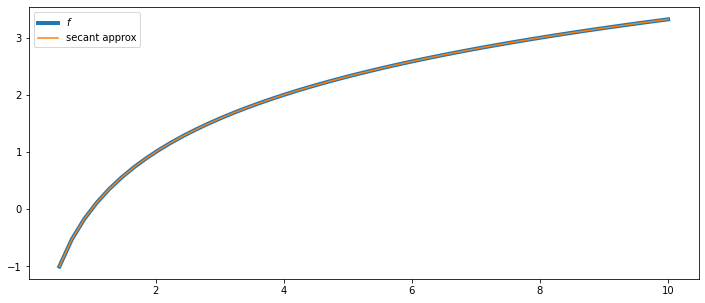

In [68]:
b = 2
f = lambda x: np.log(x)/np.log(b)
secant_vectorized = np.vectorize(secant)

domain = np.linspace(0.5, 10, 50)
plt.plot(domain, f(domain), label='$f$', lw=4)
plt.plot(domain, secant_vectorized(domain, b), label='secant approx')
plt.legend()
plt.show()